Comp Phys

HW #7

Adam Goldenberg

Python 3 code

Particle in a Box

Part A] Use separation of variables to analytically find the general solution for an infinite square well potential of width L, given by the equation.

Boundryes at 0 and L are equal to 0.

See PDF, Separation of Variables, for math.

Part B] Now use the finite difference method presented in class to solve the same problem as an eigensystem. Set this for an electron with L = 10^{−10} m. Use finite defference on the spatial part that is real only. Compare with the analitical solution and see how they differ with N. Show how a wavefunction initially a Gaussian with a standard deviation of one grid cell centered at x = 0, evolves over time.

Parts:

1] Construct computational formula for H for arbitrary value of N

2] Choose point

3] H numarically

4] Eigenvalue E and eigenvector V

5] Comparison to analytical result

6] Decompose I that you want to evolve

7] Write down formula

8] Plot I(t)

1] See PDF, Computational Formula, for math.

2] Chooseing 1000 points. The constant multiplyed determens what N needs to be. Both sides are multiplyed by 10^{10} to keep all values outside error. This is devided at the end. See PDF to see how N is chosen.

3] H numarically is the tri-diagonal matrix in the PDF produced below.

In [89]:
from scipy.sparse import diags
import numpy as np

#N = 1000

L = 1
delt = 0.001
#N = L/delt - 2

N = 998

H = diags([1, -2, 1], [-1, 0, 1], shape=(N, N)).toarray()

In [109]:
#H *= 6.104264**-3
H = -H

print("H = ")
print(H)

H = 
[[ 2. -1. -0. ... -0. -0. -0.]
 [-1.  2. -1. ... -0. -0. -0.]
 [-0. -1.  2. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ...  2. -1. -0.]
 [-0. -0. -0. ... -1.  2. -1.]
 [-0. -0. -0. ... -0. -1.  2.]]


4] Eigenvalue E and eigenvector V

In [110]:
#np algorithim for getting the eigenvalue and egienvectors
o, w = np.linalg.eig(H)

In [111]:
#sort used in class example
isort = np.argsort(o)
o = o[isort]
w = w[:,isort]

#Outputs the square of the vecotrs, need the square root
om = np.sqrt(o)

5] Comparison to analytical result

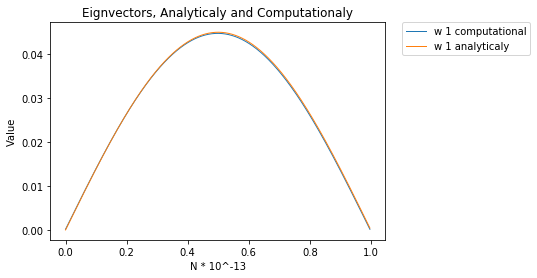

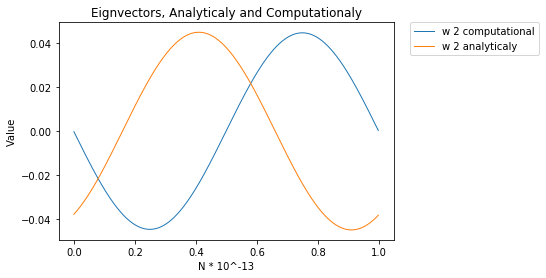

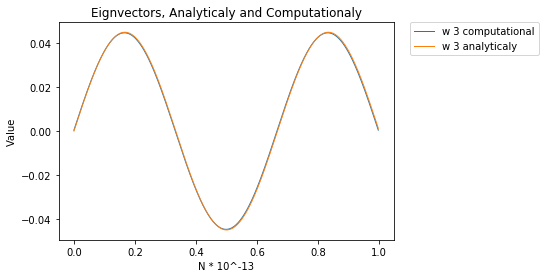

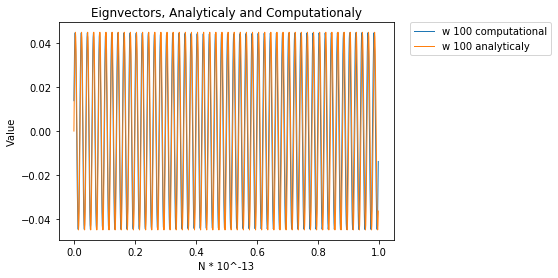

In [134]:
import matplotlib.pyplot as plt
import math

x = [0 + n*delt for n in range(0,998)]

#x = np.arange(N, dtype="double")
#x *= (1/N)
#L = 10**10

plt.figure(1)
plt.plot(x,w[:,0], label = "w " + str(1) + " computational", linewidth=1)
y = np.zeros(N)
n = 1
for i in range(N):
    y[i] = 0.045 * math.sin(math.pi * (x[i]))
plt.plot(x,y, label = "w " + str(1) + " analyticaly", linewidth=1)
plt.title("Eignvectors, Analyticaly and Computationaly")
plt.xlabel("N * 10^-13")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(2)
plt.plot(x,w[:,1], label = "w " + str(2) + " computational", linewidth=1)
y = np.zeros(N)
n = 2
for i in range(N):
    y[i] = 0.045 * math.sin(math.pi * n *(x[i]) - (L))
plt.plot(x,y, label = "w " + str(2) + " analyticaly", linewidth=1)
plt.title("Eignvectors, Analyticaly and Computationaly")
plt.xlabel("N * 10^-13")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(3)
plt.plot(x,w[:,2], label = "w " + str(3) + " computational", linewidth=1)
y = np.zeros(N)
n = 3
for i in range(N):
    y[i] = 0.045 * math.sin(math.pi * n *(x[i]))
plt.plot(x,y, label = "w " + str(3) + " analyticaly", linewidth=1)
plt.title("Eignvectors, Analyticaly and Computationaly")
plt.xlabel("N * 10^-13")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(4)
plt.plot(x,w[:,99], label = "w " + str(100) + " computational", linewidth=1)
y = np.zeros(N)
n = 100
for i in range(N):
    y[i] = 0.045 * math.sin(math.pi * n *(x[i]))
plt.plot(x,y, label = "w " + str(100) + " analyticaly", linewidth=1)
plt.title("Eignvectors, Analyticaly and Computationaly")
plt.xlabel("N * 10^-13")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

This still needs to be normalized. We can see the corect patterns for the computational results in the first 3 graphs. A wave function with the ends being nodes. The first starts with a wavelength of 2L, the second has a wavelength of L and the third a wavelength of 3/2 L. This is followed by the analytical result (not corectly shifted). The fourth graph with n = 100 have the values changeing quickly. This alows for more errors.

6] Decompose I that you want to evolve

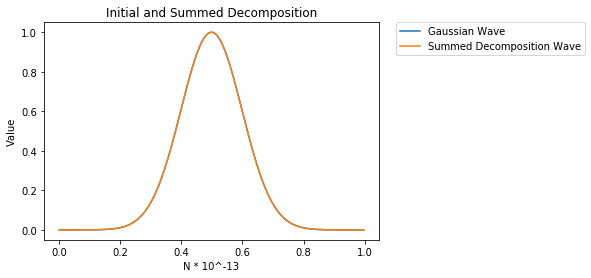

In [135]:
from scipy import signal

initial = signal.gaussian(N, std=100)
winv = np.linalg.inv(w)
ak = winv.dot(initial)

plt.figure(5)
plt.plot(x, initial, label = "Gaussian Wave")
plt.plot(x, w.dot(ak), label = "Summed Decomposition Wave")
plt.title("Initial and Summed Decomposition")
plt.xlabel("N * 10^-13")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

As we can see, the decomposed elements when doted (summed) give us back our initial gaussian.

7] Se the PDF for the time step formula.

8] Plot I(t)

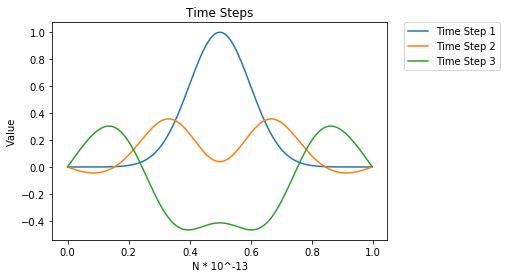

In [136]:
def timeStep(t):
    coeffs = ak * np.cos(o * (9.482522**33) * t)
    y = w.dot(coeffs).flatten()
    return y

def plotTime(tmin, tmax, step):
    plt.figure(6)
    for i in np.arange(tmin, tmax, step):
        plt.plot(x, timeStep(i), label = "Time Step " + str(i + 1))
    plt.title("Time Steps")
    plt.xlabel("N * 10^-13")
    plt.ylabel("Value")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
plotTime(0, 3, 1)

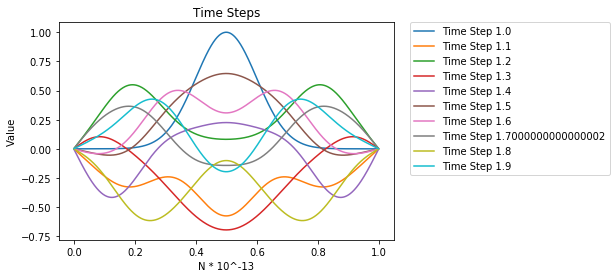

In [132]:
plotTime(0, 1, 0.1)

This shows the gausian as ocilating up and down in time.

Part C] Now alter the system to instead compute the wavefunction in the finite square well potential. Set V0 equal to a large multiple of h(bar)^2 / 2mL^2.

See PDF for math.

In [1]:
from scipy.sparse import diags
import numpy as np

N = 1038
H2 = diags([1, -2, 1], [-1, 0, 1], shape=(N, N)).toarray()

In [2]:
V = 6.104254 * 10**-4

#H2 *= 6.104264**-3

H2 = -H2

for i in range(20,119,1):
    H2[i][i] = H2[i][i] - V

print("H = ")
print(H2)

H = 
[[ 2. -1. -0. ... -0. -0. -0.]
 [-1.  2. -1. ... -0. -0. -0.]
 [-0. -1.  2. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ...  2. -1. -0.]
 [-0. -0. -0. ... -1.  2. -1.]
 [-0. -0. -0. ... -0. -1.  2.]]


This is the same matrix as before with 20 values on each side (40 extra elements total) to represent elements outside the well. The exta v value is subtracted from the 96 diagonal elements in the center of the matrix to acount for the well's energy.

4] Eigenvalue E and eigenvector V

In [3]:
#np algorithim for getting the eigenvalue and egienvectors
o2, w2 = np.linalg.eig(H2)

In [5]:
#sort used in class example
isort = np.argsort(o2)
o2 = o2[isort]
w2 = w2[:,isort]

#Outputs the square of the vecotrs, need the square root
om = np.sqrt(o2)

E:\Python\JupyterFiles\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


5] Comparison to analytical result

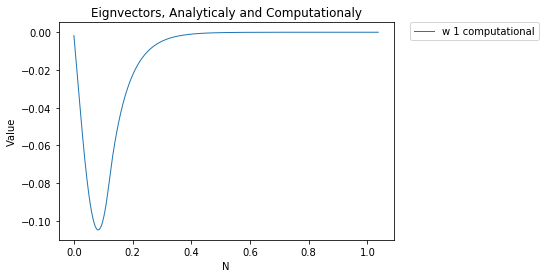

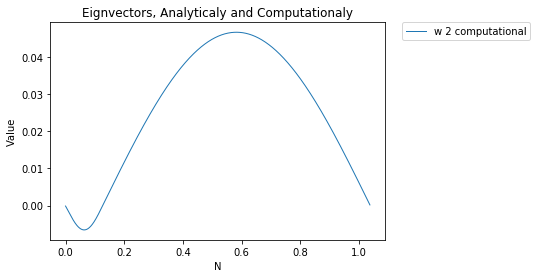

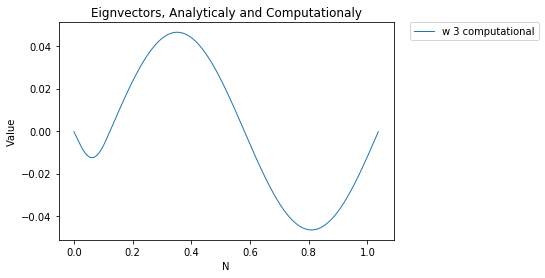

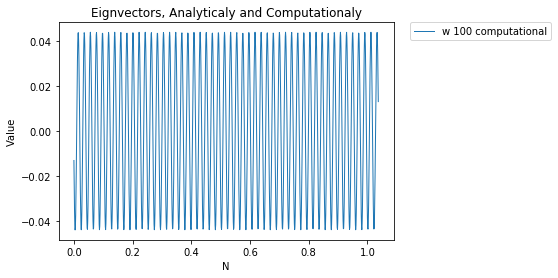

In [21]:
import matplotlib.pyplot as plt
import math

#x = np.arange(N, dtype="double")
#x *= (1/N)
#L = 10**10

L = 1
delt = 0.001

x = [0 + n*delt for n in range(0,1038)]
#x = np.arange(0,1038)

plt.figure(7)
plt.plot(x,w2[:,0], label = "w " + str(1) + " computational", linewidth=1)
plt.title("Eignvectors, Analyticaly and Computationaly")
plt.xlabel("N")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(8)
plt.plot(x,w2[:,1], label = "w " + str(2) + " computational", linewidth=1)
plt.title("Eignvectors, Analyticaly and Computationaly")
plt.xlabel("N")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(9)
plt.plot(x,w2[:,2], label = "w " + str(3) + " computational", linewidth=1)
plt.title("Eignvectors, Analyticaly and Computationaly")
plt.xlabel("N")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(10)
plt.plot(x,w2[:,99], label = "w " + str(100) + " computational", linewidth=1)
plt.title("Eignvectors, Analyticaly and Computationaly")
plt.xlabel("N")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

6] Decompose I that you want to evolve

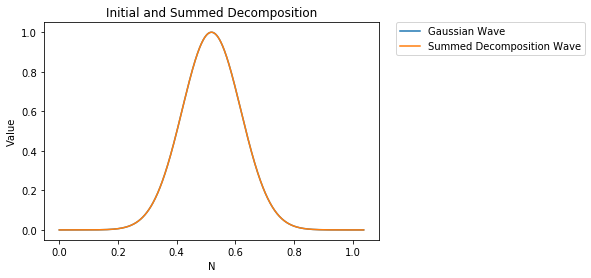

In [22]:
from scipy import signal

initial = signal.gaussian(N, std=100)
winv2 = np.linalg.inv(w2)
ak2 = winv2.dot(initial)

plt.figure(11)
plt.plot(x, initial, label = "Gaussian Wave")
plt.plot(x, w2.dot(ak2), label = "Summed Decomposition Wave")
plt.title("Initial and Summed Decomposition")
plt.xlabel("N")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

7] Se the PDF for the time step formula.

8] Plot I(t)

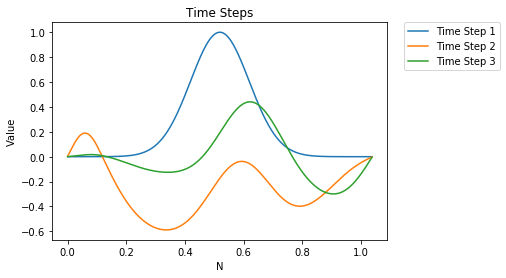

In [23]:
def timeStep2(t):
    coeffs2 = ak2 * np.cos(o2 * (9.482522**33) * t)
    y = w2.dot(coeffs2).flatten()
    return y

def plotTime2(tmin, tmax, step):
    plt.figure(12)
    for i in np.arange(tmin, tmax, step):
        plt.plot(x, timeStep2(i), label = "Time Step " + str(i + 1))
    plt.title("Time Steps")
    plt.xlabel("N")
    plt.ylabel("Value")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
plotTime2(0, 3, 1)

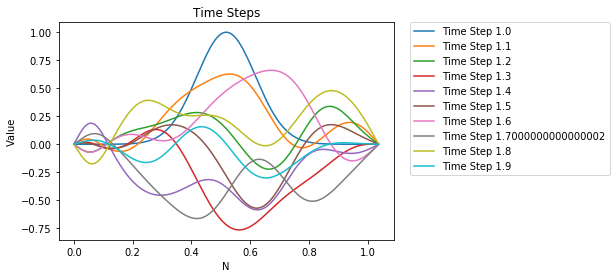

In [24]:
plotTime2(0, 1, 0.1)